# Seaborn
- A statistical plotting library
- Beautiful default styles
- Work very well with pandas dataframe objects
- Built on top of matplotlib
- Official documentation: http://seaborn.pydata.org/

## Installation

In [ ]:
conda install seaborn

In [ ]:
pip install seaborn

In [1]:
#Import
import seaborn as sns
%matplotlib inline

##  Data
- sns.load_dataset('data'): load data

##  1. Distribution Plots

### distplot: The distplot shows the distribution of a **univariate** (one variable) set of observations.
- sns.distplot([df[col]], kde = False, bins = 10): default kde = True, kde is a a density curve, bin is the number of bins in total
    
### jointplot

**jointplot(x=, y=, data=)** allows you to basically match up two distplots for bivariate data (two variables). It has a **kind** parameter gives your choice of what kind to compare with: 
* “scatter” (default)
* “reg”: regression line
* “resid”: residual
* “kde” 
* “hex”

### pairplot: pair every single combination for all numerical value in df
Pairplot will plot pairwise relationships across an entire dataframe for the **numerical** columns and supports a color **hue** argument for categorical columns. 
-sns.pairplot(df, hue='categorial var', pallete='color')

### rugplot
It just draws a dash mark for every point on a univariate distribution. They are the building block of a KDE plot.
- sns.rugplot(df['col'])

### kdeplot
kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.
- sns.kdeplot(df['col'])

# 2. Categorical Data Plots


For presentation: barplot, countplot, boxplot

Advance info for data scientist: violinplot, stripplot, swarmplot

## barplot
- sns.barplot(x='categorical',y='nuemrical', data= , estimator=): by default it shows the mean value of y for x

## countplot: similar as barplot but the estimator counts the occurences
- sns.countplot(x='var', data= )

## boxplot - more for general people
Boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 

The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

You can add hue parameter to enable multi level comparison.
- sns.boxplot(x='categorical', y='numerical', data= , hue='another cat')


## violinplot - more for tech people
Similar as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
- sns.violinplot(x='categorical', y='numerical', data=, hue='another cat', split=T/F): it has a split parameter that asks you if you want to split the hue var into x var.


## stripplot: scatterplot based off category
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.
- sns.stripplot(x='category', y='numerical', data=, jitter=True, hue=, split= )
    - jitter=true can see the density more clear
    - hue
    - split

## swarmplot: combination of violinplot and stripplot
The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).
- sns.swarmplot(x='category', y='numerical', data= , hue='other cat', split=T/F)
    - hue
    - split
- We could add the swarmplot after violinplot, then the swarmplot appears on top of violinplot.

## factorplot
factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type.
- sns.factorplot(x='categorical',y='numerical',data=,kind='bar/violin/boxplot')


# 3. Matrix Plots
- Plot data as color-encoded matrices
- Indicate **clusters** wihtin the data

## heatmap
Data should already be in a matrix form, the sns.heatmap function basically just colors it in for you.

1. correlction: df.corr()

2. pivot table: df.pivot_table(index='month', columns='year', values='passengers')

Then turn them into a heatmap:
- sns.heatmap(matrix.df, annot=True, cmap='coolwarm')
    - annot: show the number in each cell
    - cmap: color map like 'magma', 'coolwarm'
    - linecolor: separation line color
    - linewidths: separation line thickness

## clustermap
The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. It cluster rows and columms together based on similarity.
- sns.clustermap(matrix.df, standard_scale =1)
    -standard_scale = 1, the number scale set to 1

## heatmap vs. clustermap
- heatmap displays things you put them in
- clustermap displays things close to each other

# 4. Grids
Grids are general types of plots that allow you to map plot **types** to rows and columns of a grid, this helps you create similar plots separated by features.

It gives you control of plot, we can map the plot to different kind, ex: it sets diagnoal, upper and lower to different type of plot
- g.map(sns.distplot/boxplot...)


## PairGrid
Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

g = sns.PairGrid(df)

g.map_diag(sns.distplot)

g.map_upper(plt.scatter)

g.map_lower(sns.kdeplot)


## FacetGrid
FacetGrid is the general way to create grids of plots based off of a feature:
- sns.FacetGrid(df, rol=, col= ): different row is levels of a variable, diff. column is levels a variable
- g.map(sns.distplot, 'numerical var')


## JointGrid
JointGrid is the general version for jointplot() type grids.



# 5.Regression Plots

Seaborn has many built-in capabilities for regression plots such as **lmplot()** function.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.


## lmplot()
- sns.lmplot(x=',y=,data=)
    - hue: categorical var for separation 
    - marker: markers = ['o', 'v'])
    - plt.scatter(scatter_kws
    
lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the **squared markersize**. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

- sns.lmplot(x=, y=, data=, hue=, markers=['o', 'v'], scatter_kws={'s':100})
    - s: marker size
- sns.lmplot(x=, y=, data=, col= ): use col to separate data into different level of a variable


## Aspect and Size

Seaborn figures can have their size and aspect(high:width) ratio adjusted with the **size** and **aspect** parameters
- aspect: figure high and width ratio
- size: figure size

 # 6. Style and Color
 
 
 ## Style
- sns.set_style('ticks')
- sns.despine(left=True, bottom=True): remove spines

## Size and Aspect
Can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect:
- sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

## Scale and Context
The set_context() allows you to override default parameters.
- set_context('poster'/'notebook')]
    - fond_scale =: change font size

## palette: google matplotlib colormap


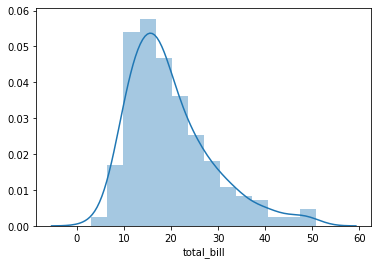

In [11]:
#Distplot
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

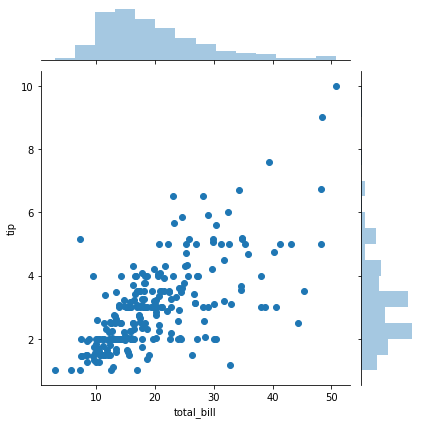

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind = )

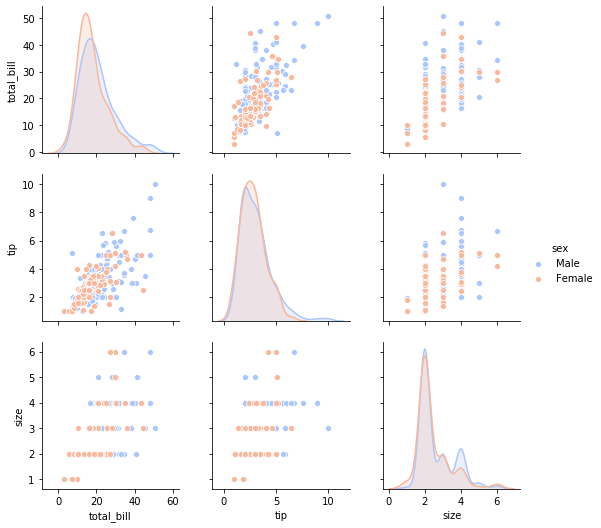

In [16]:
sns.pairplot(tips, hue = 'sex', palette='coolwarm')

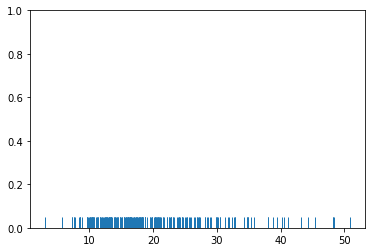

In [19]:
sns.rugplot(tips['total_bill'])

(0, 1)

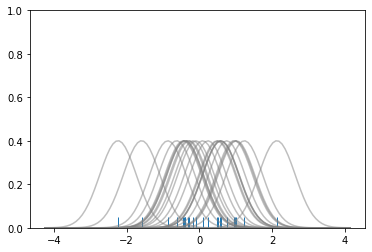

In [21]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

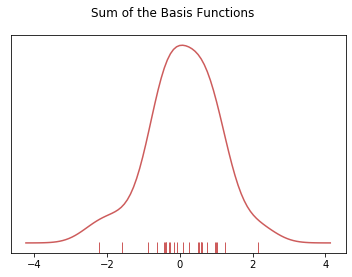

In [22]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

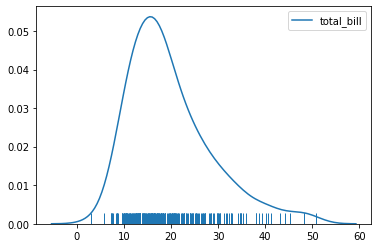

In [23]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

In [25]:
import numpy as np

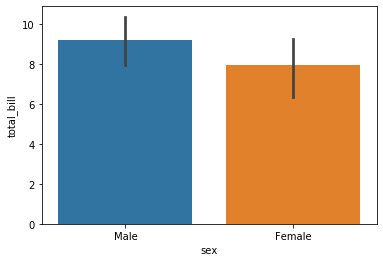

In [28]:
sns.barplot(x='sex',y='total_bill', data=tips, estimator =np.std)

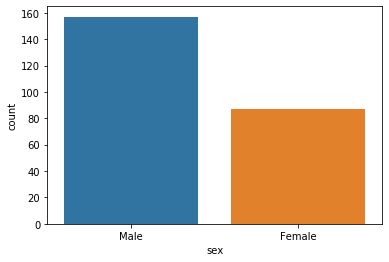

In [31]:
sns.countplot(x='sex', data=tips)

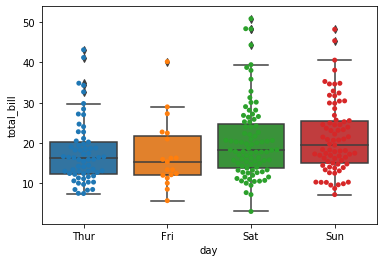

In [49]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')

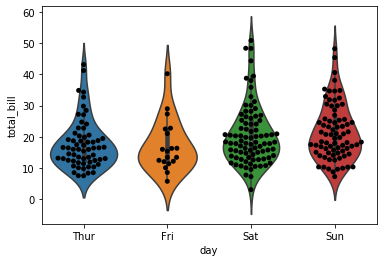

In [53]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


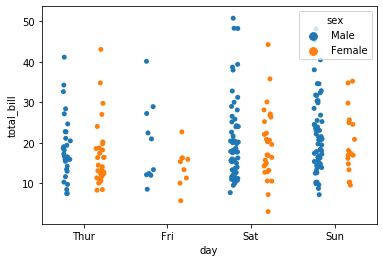

In [40]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', split='True')

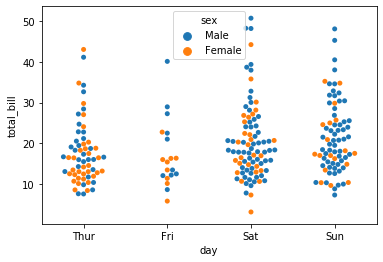

In [48]:
sns.swarmplot(x='day', y='total_bill', data=tips, hue='sex')

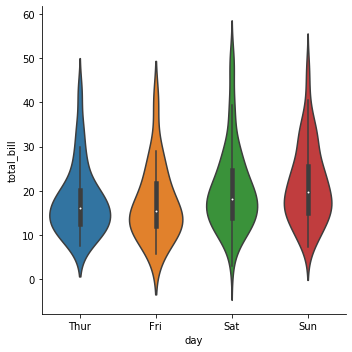

In [56]:
sns.factorplot(x='day',y='total_bill',data=tips, kind='violin')

In [58]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [59]:
tc = tips.corr()

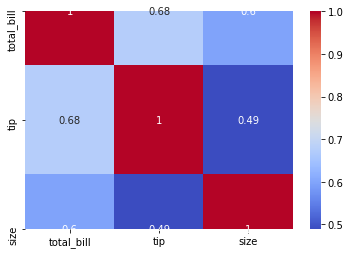

In [62]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [67]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [77]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

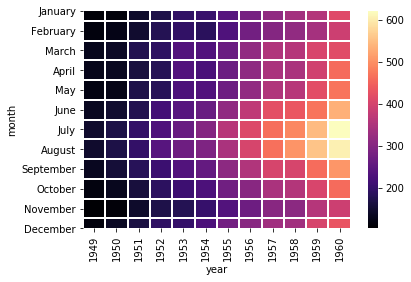

In [80]:
sns.heatmap(fp, cmap='magma', linecolor = 'white', linewidths = 1)

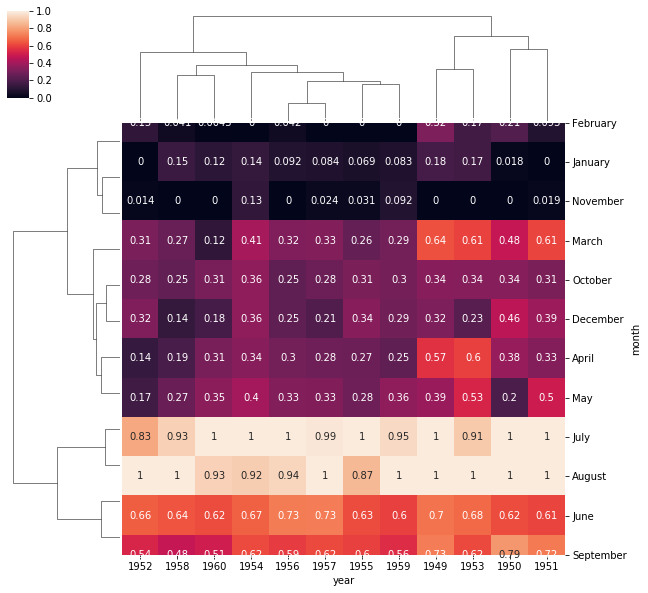

In [83]:
sns.clustermap(fp, standard_scale=1, annot=True)

In [86]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [87]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

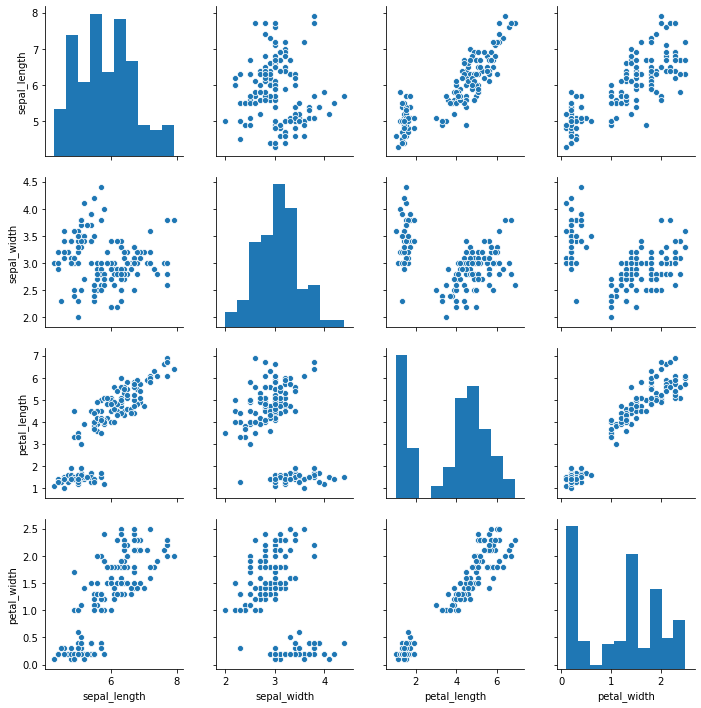

In [88]:
sns.pairplot(iris)

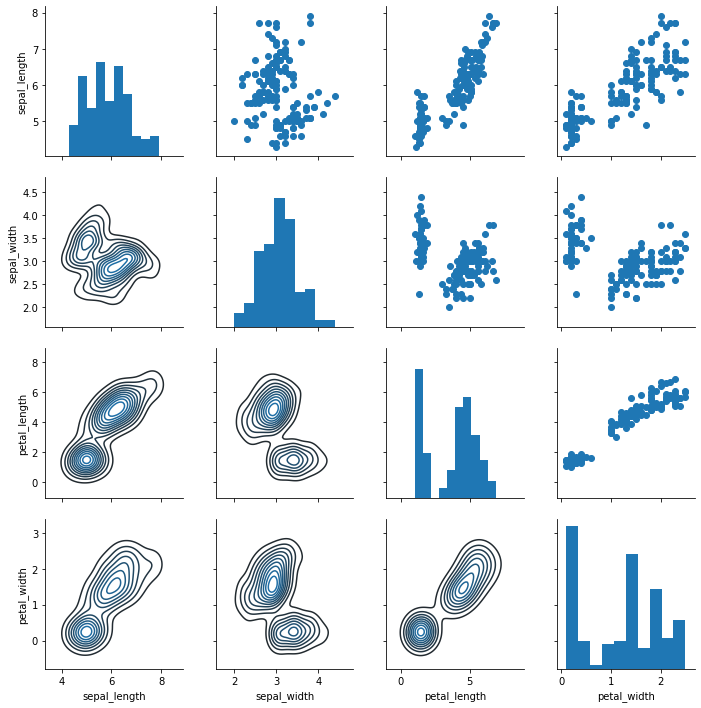

In [102]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [94]:
tips = sns.load_dataset('tips')

In [95]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


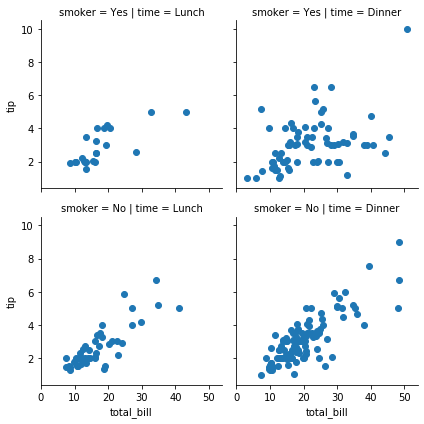

In [105]:
g=sns.FacetGrid(data=tips, row='smoker', col='time')
g.map(plt.scatter, 'total_bill', 'tip')

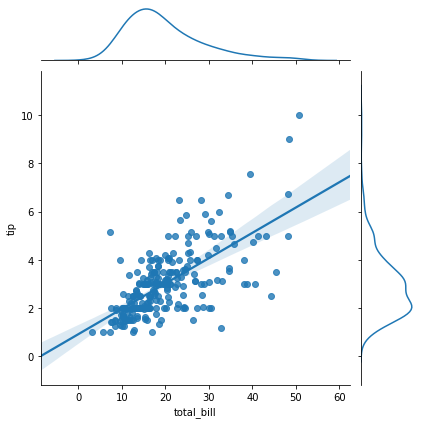

In [121]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.kdeplot)

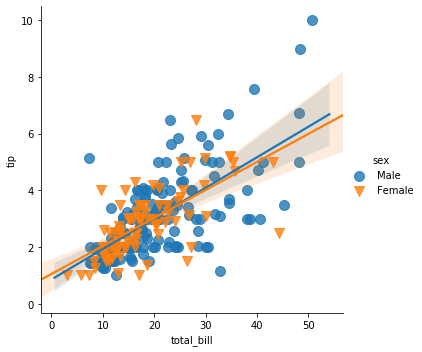

In [130]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'v'], scatter_kws={'s':100})

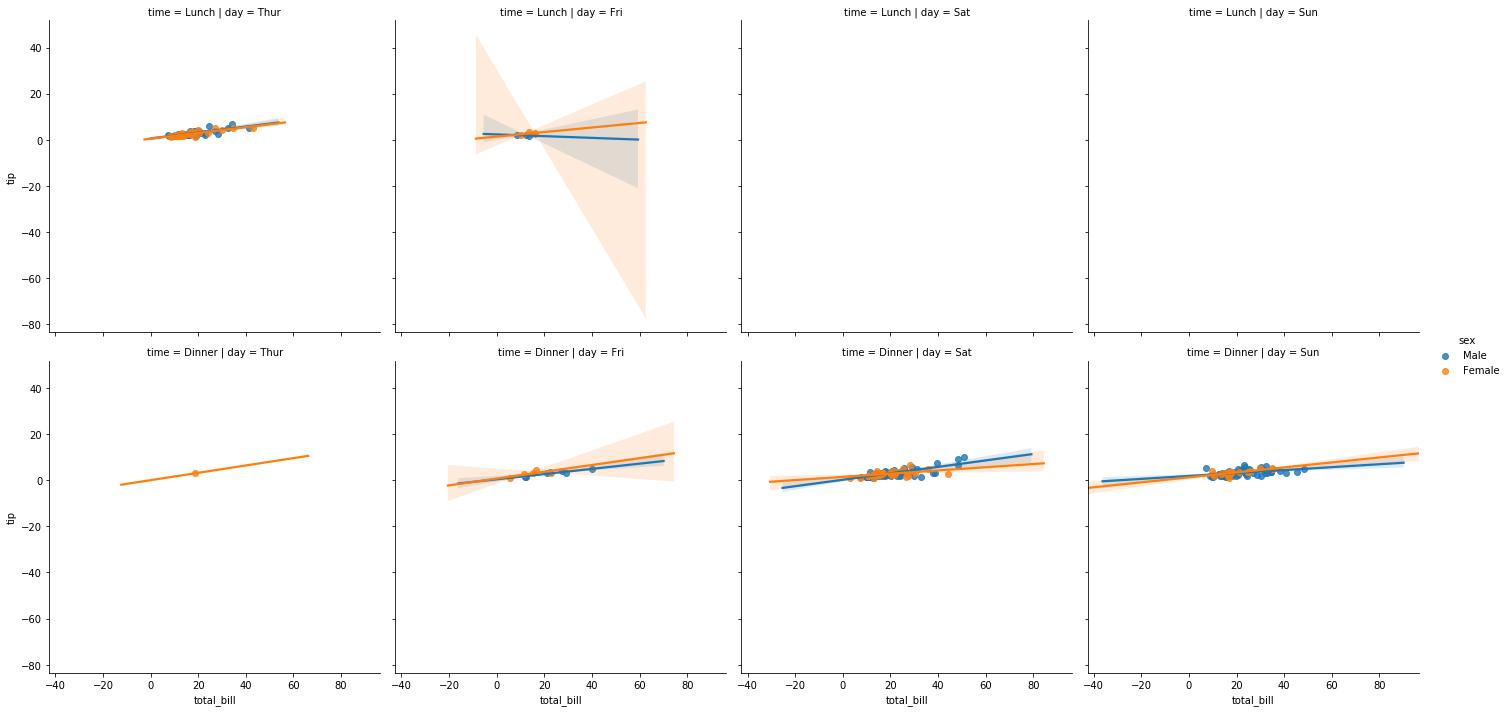

In [135]:
sns.lmplot(x='total_bill', y='tip', data = tips, col='day', row='time', hue='sex')

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


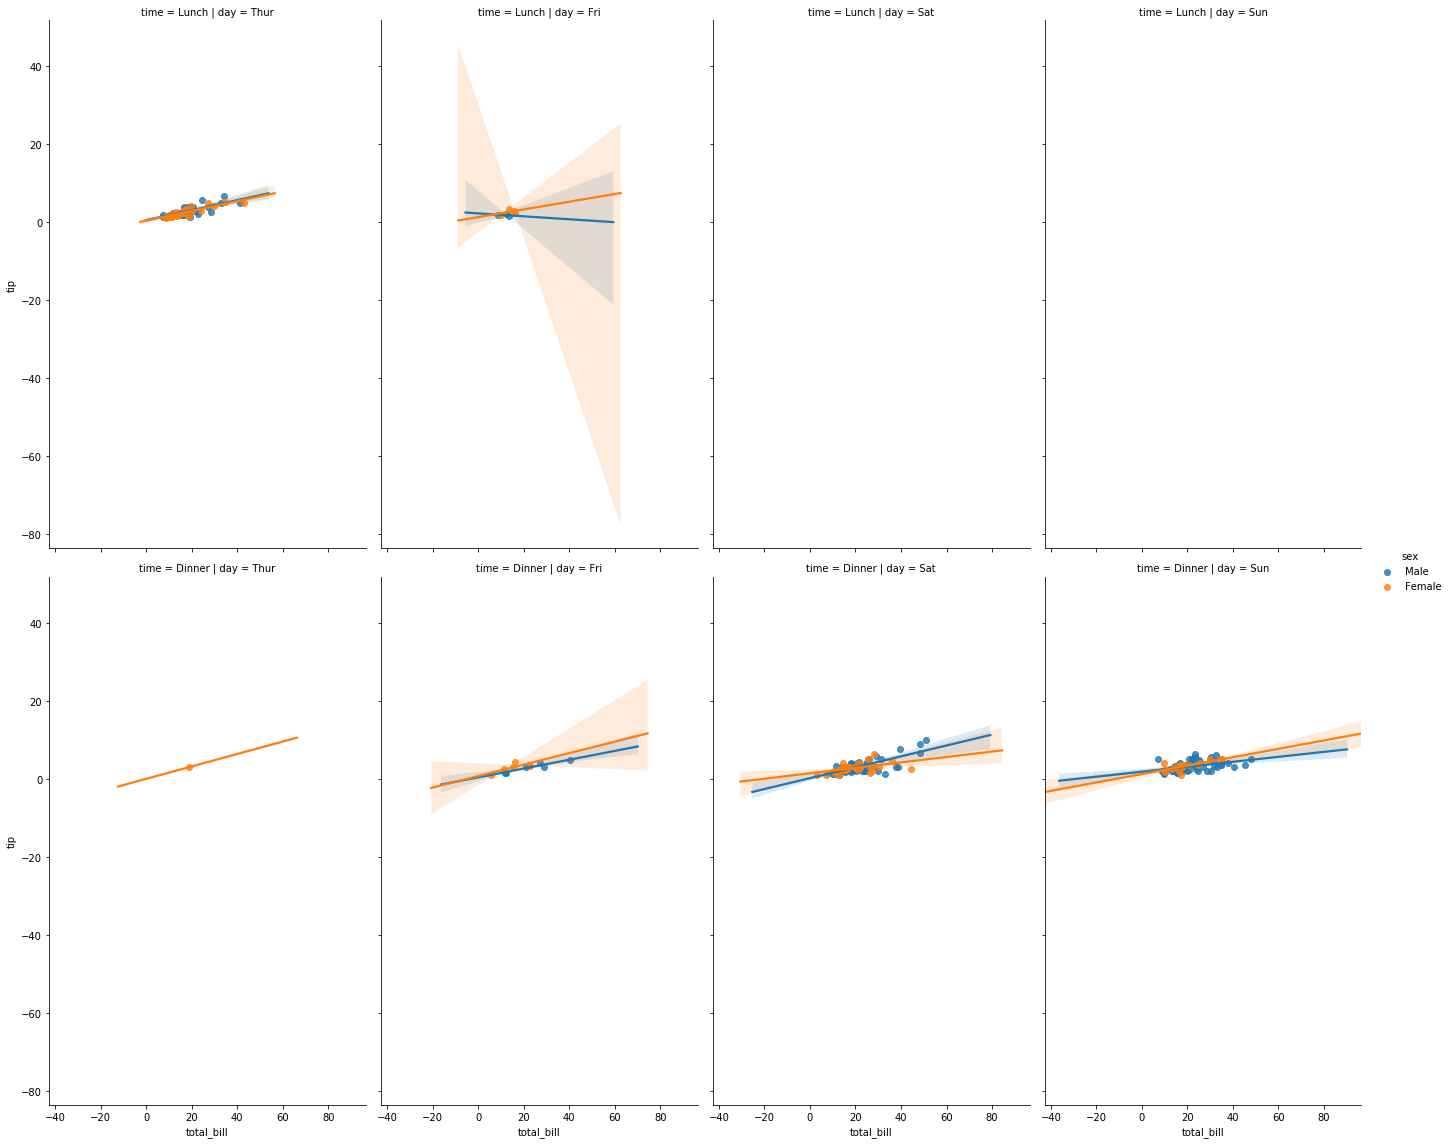

In [137]:
sns.lmplot(x='total_bill', y='tip', data = tips, col='day', row='time', hue='sex', aspect=0.6, size=8)

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

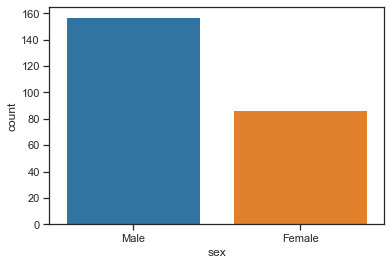

In [156]:
#style 
sns.set_context('notebook')
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)

